### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [24]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [25]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [26]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")
file_name  = "dataset.csv"

---


# Test Environment


In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

<!-- Write a Python code that can perform the following tasks.
1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.
2. Print the first 5 rows of the dataframe to verify correct loading. -->

In [ ]:

file_path = "dataset.csv" 
df = pd.read_csv(file_path, header=0) 
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


<!-- Write a Python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame. -->

In [ ]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
# Data Cleaning

# cols_with_na = df.columns[df.isna().any()].tolist() 
# df[cols_with_na] = df[cols_with_na].fillna(df[cols_with_na].mean()) 
# df = df.drop_duplicates()

numeric_cols = df.select_dtypes(include=[np.number]).columns
cols_with_na = [col for col in numeric_cols if df[col].isna().any()]

df[cols_with_na] = df[cols_with_na].fillna(df[cols_with_na].mean())

# For categorical columns, fill with mode (most frequent) or a placeholder
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

df = df.drop_duplicates()

<!-- Write a Python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame. -->

In [29]:
import numpy as np
# Identify the 5 attributes that have the highest correlation with the price parameter.

target_col = "price" 
num_df = df.select_dtypes(include=[np.number]) 
corr = num_df.corr() 
top5_features = corr[target_col].abs().drop(labels=[target_col]).sort_values(ascending=False).head(5) 
print(top5_features)

year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


<!-- Write a Python code that counts the number of entries in a dataframe with each unique value of a specific attribute. -->

In [30]:
# Count the number of cars under each unique value of fuelType attribute.

attr = "fuelType" # replace with your column name 
counts = df[attr].value_counts() 
print(counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


<!-- Write a Python code that creates a Seaborn box plot between a source and target attributes of a dataframe. -->

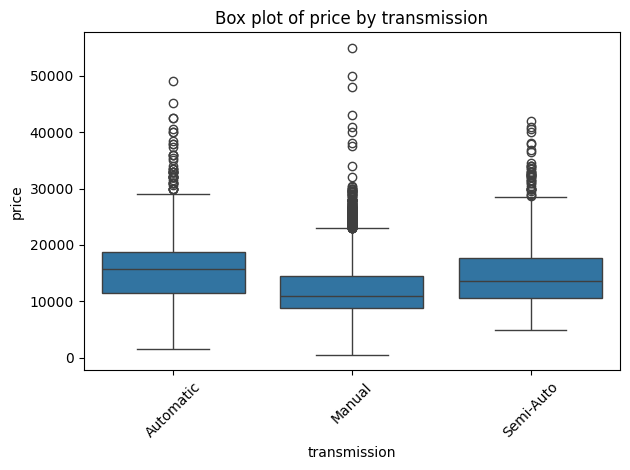

In [31]:
# Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

import seaborn as sns 
import matplotlib.pyplot as plt

source_col = "transmission" # replace with your source (categorical) column 
target_col = "price" # replace with your target (numeric) column

sns.boxplot(x=source_col, y=target_col, data=df) 
plt.xlabel(source_col) 
plt.ylabel(target_col) 
plt.title(f'Box plot of {target_col} by {source_col}') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

<!-- Write a Python code that creates a regression plot between a source attribute and a target attribute. -->

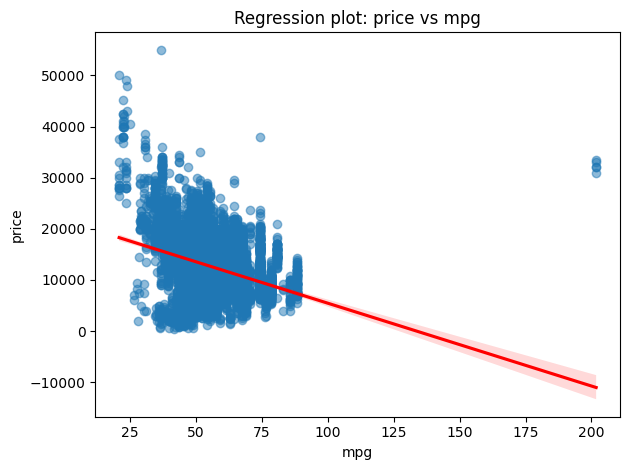

In [32]:
# Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.v

import seaborn as sns 
import matplotlib.pyplot as plt

source_col = "mpg" # replace with your numeric source column 
target_col = "price" # replace with your numeric target column

sns.regplot(x=source_col, y=target_col, data=df, scatter_kws={"alpha":0.5}, line_kws={"color":"red"}) 
plt.xlabel(source_col) 
plt.ylabel(target_col) 
plt.title(f"Regression plot: {target_col} vs {source_col}") 
plt.tight_layout() 
plt.show()

<!-- Write a Python code to fit a linear regression model on a target variable on basis of a source variable. Calculate the R^2 values and MSE values for this model. -->

In [33]:
# Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

import numpy as np

source_col = "mpg" # replace with your source column name 
target_col = "price" # replace with your target column name

X = df[[source_col]].to_numpy(dtype=float) 
y = df[target_col].to_numpy(dtype=float) 
n = y.size

Xb = np.hstack([np.ones((n, 1)), X]) 
beta = np.linalg.pinv(Xb) @ y 
yhat = Xb @ beta

ss_res = ((y - yhat) ** 2).sum() 
ss_tot = ((y - y.mean()) ** 2).sum() 
r2 = 1 - ss_res / ss_tot 
mse = ss_res / n

print("R2:", r2) 
print("MSE:", mse)

R2: 0.1198980224962416
MSE: 19741690.809446193


<!-- Write a Python code to fit a linear regression model on a target variable on basis of a set of source variables. Calculate the R^2 values and MSE values for this model. -->

In [34]:
# Fit a linear regression model to predict the price using the following set of features.
# year, mileage, tax, mpg and engineSize.
# Calculate the R^2 and MSE values for this model.

import numpy as np

source_cols = ["year", "mileage", "tax", "mpg", "engineSize"]
target_col = "price"

X = df[source_cols].to_numpy(dtype=float) 
y = df[target_col].to_numpy(dtype=float) 
n = y.size

Xb = np.hstack([np.ones((n, 1)), X]) 
beta = np.linalg.pinv(Xb) @ y 
yhat = Xb @ beta


ss_res = ((y - yhat) ** 2).sum() 
ss_tot = ((y - y.mean()) ** 2).sum() 
r2 = 1 - ss_res / ss_tot 
mse = ss_res / n

print("R2:", r2) 
print("MSE:", mse)


R2: 0.7265379654547036
MSE: 6134065.224381661


<!-- Write a Python code that can perform the following tasks.

1. Create a pipeline with standard scalar, second degree polynomial features and linear regression model.
2. Fit this pipeline for a target variable using a set of source attributes from a dataframe.
3. Evaluate the R^2 and MSE values for the trained model. -->

In [35]:
# For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

source_cols = ["year", "mileage", "tax", "mpg", "engineSize"]
target_col = "price"

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.linear_model import LinearRegression

X = df[source_cols].to_numpy(dtype=float) 
y = df[target_col].to_numpy(dtype=float) 
n = y.size

pipe = Pipeline([ ("scaler", StandardScaler()), ("poly", PolynomialFeatures(degree=2, include_bias=False)), ("model", LinearRegression()) ])

pipe.fit(X, y) 
yhat = pipe.predict(X)

ss_res = ((y - yhat) ** 2).sum() 
ss_tot = ((y - y.mean()) ** 2).sum() 
r2 = 1 - ss_res / ss_tot 
mse = ss_res / n

print("R2:", r2) 
print("MSE:", mse)

R2: 0.7666619695239302
MSE: 5234038.065462741


<!-- Write a Python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
3. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data. -->

In [ ]:
# For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test datav

source_cols = ["year", "mileage", "tax", "mpg", "engineSize"]
target_col = "price"

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error, r2_scorec
from sklearn.preprocessing import StandardScaler

X = df[source_cols].to_numpy(dtype=float) 
y = df[target_col].to_numpy(dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on training set only, then transform both
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Ridge(alpha=0.1) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print("R2:", r2) 
print("MSE:", mse)

R2: 0.6917134446113066
MSE: 6912725.801055086


<!-- Write a Python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Ridge regression model using the training data, setting the regularization parameter to 0.1.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data. -->

In [ ]:
# Perform a second order polynomial transform on both the training data and testing data created for the 
# question above. Create and fit a Ridge regression object using the modified training data, set the 
# regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

source_cols = ["year", "mileage", "tax", "mpg", "engineSize"]
target_col = "price"

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df[source_cols].to_numpy(dtype=float) 
y = df[target_col].to_numpy(dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on training set only, then transform both
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False) 
X_train_poly = poly.fit_transform(X_train) 
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=0.1) 
ridge.fit(X_train_poly, y_train)

y_pred = ridge.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print("R2:", r2) 
print("MSE:", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.1777e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R2: 0.673274888823681
MSE: 7326174.5165419085


<!-- Write a Python code that can perform the following tasks.

1. Assuming that a subset of the attributes of a data frame are source attributes and one of the attributes is a target attribute, split the data into training and testing data assuming the testing data to be 20%.
2. Apply second degree polynomial scaling to the training and testing data.
3. Create and fit a Grid search on Ridge regression with cross validation using the training data, for a set of values of the parameter alpha.
4. Calculate the MSE and R^2 values for the Ridge Regression model using the testing data. -->

In [ ]:
# In the question above, perform a Grid Search on ridge regression for a set of values of 
# alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to 
# be used for the prediction model.

source_cols = ["year", "mileage", "tax", "mpg", "engineSize"]
target_col = "price"

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = df[source_cols].to_numpy(dtype=float) 
y = df[target_col].to_numpy(dtype=float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Fit on training set only, then transform both
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pipe = Pipeline([ ("poly", PolynomialFeatures(degree=2, include_bias=False)), ("ridge", Ridge()) ])

param_grid = { "ridge__alpha": [0.01, 0.1, 1.0, 10.0, 100.0] }

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1) 
grid.fit(X_train, y_train)

best_model = grid.best_estimator_ 
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print("Best alpha:", grid.best_params_["ridge__alpha"]) 
print("R2:", r2) 
print("MSE:", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.81617e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.8643e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.85145e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.82541e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.73209e-25): resu

Best alpha: 0.01
R2: 0.38273414165699104
MSE: 13840985.11755802


In [ ]:
# Congratulations! You have completed this guided project on using Generative AI for different data science tasks.

# By the end of this project, you are now capable of using Generative AI for the tasks of:

#     Data preparation: cleaning, transforming and augmentation
#     Data analysis: drawing insight, creating visualizations
#     Model development: creating simple as well as complex prediction models
#     Model refinement: found the optimum model using Grid Search